# Exploratory Analysis (House Prices)

## 1. Description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With `79 explanatory` variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer

import missingno as msno

import seaborn as sns

## 2. Dataframe main characteristics.

In [6]:
df = pd.read_csv('data/train.csv')
print ('Dataframe shape: ',df.shape)
print ('_____________________ \n ')
print ( 'Df columns: \n', df.columns)
print ('_____________________ \n ')

Dataframe shape:  (1460, 81)
_____________________ 
 
Df columns: 
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'Garag

`80 features plus one label` (int64), with some of them categorical (object) and numerical (int and float).

## 3. Missing Values

In [8]:
# FUNCTION TO CHECK FOR NANS AND THEIR RELATIVE %
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

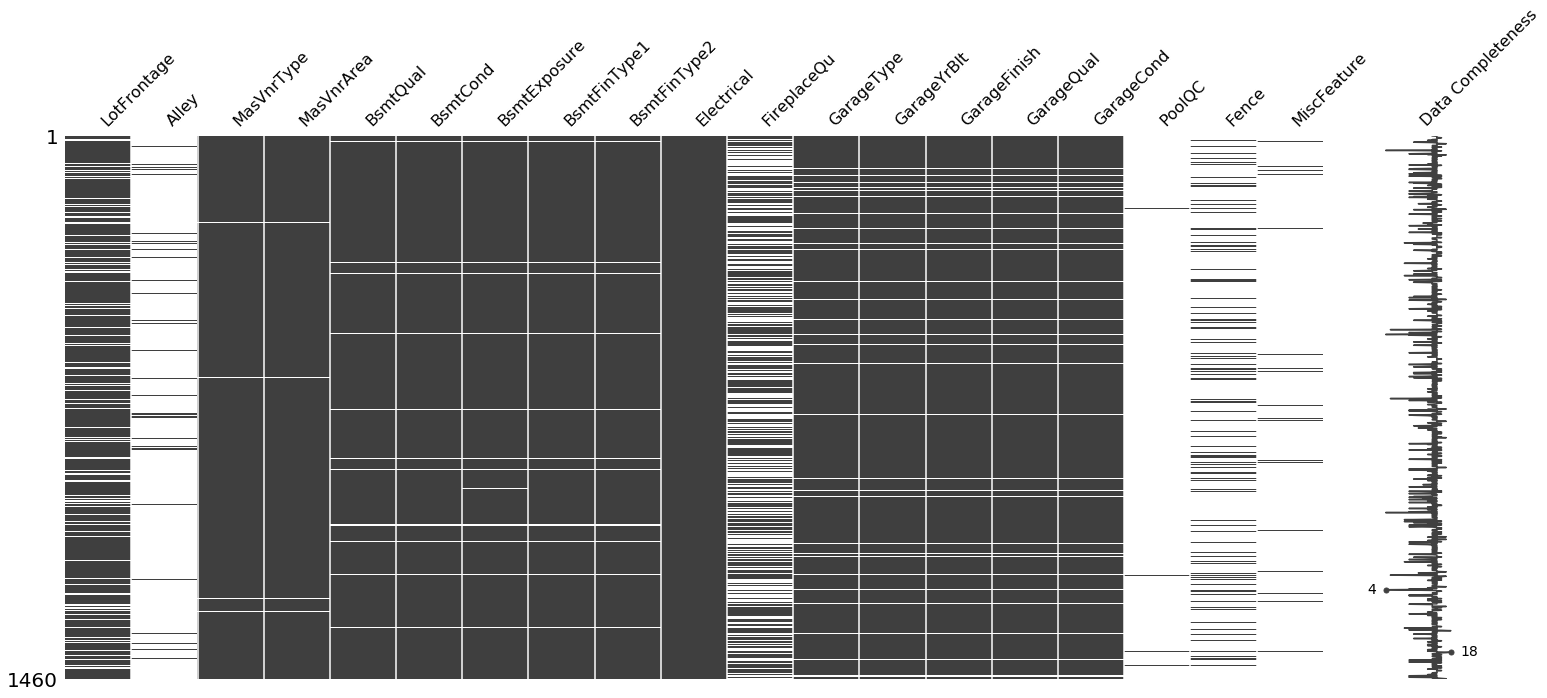

In [9]:
msno.matrix(df[null_columns],labels=True)
plt.show()

In [10]:
missing_percentage(df)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


**Missing NaNs are not so bad here....**
1. `PoolQC`: NaNs for the houses without swimming pools | **object(CAT)**
2. `Fence`: NaNs when there are not fence | **obejct(CAT)**
3. `MiscFeature`: 54 with value (49 with shed) | **object(CAT)**
4. `FireplaceQu` --> NaN is not fireplace --> keep. | **object(CAT)**
5. `Alley` --> NaN is no Alley | **object(CAT)**
6. `MasVnrType` --> 8 NaNs. Majority of category is None, so we map NaN to None. | **object(CAT)**
7. `GarageType`--> Na is no garage (dummy create column nan) | **object(CAT)**
8. `GarageYrBlt` --> Na is no Garage. This variable is Year of construction. We will drop this variable. | **int64**
9. `GarageFinish` --> Na is no Garage. (dummy create column nan) | **object(CAT)**
10. `GarageQual`--> Na is no Garage. (dummy create column nan) | **object(CAT)**
11. `GarageCond` --> NA is no garage. (dummy create column nan) | **object(CAT)**
12. `Electrical` --> Na is no data --> Replace for most common | **object(CAT)**
13. `BsmtCond`--> Na is no Basement | **object(CAT)**
14. `BsmtExposure` --> Na no Basement | **object(CAT)**
15. `BsmtFinType1` --> Na no Basement | **object(CAT)**
16. `BsmtFinType2` --> Na no Basement | **object(CAT)**
17. `BsmtQual`--> Na is no Basement | **object(CAT)**

**Missing NaNs more complicated**
1. `LotFrontage` : linear feet of street connected to property --> 259 NaNs. Why? NaN es 0? 0 have sense here? impute nan values with mean?
2. `MasVnrArea`: the 8 NaNs are mapped to 0(same than MasVNrType)


**Procedures:**  
`Create new columns with *No_feature*`: PoolQC, Fence, MiscFeature, FireplaceQu, Alley, GarageType, GarageFinish, GarageQual, GarageCond, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,BsmtQual

`Replace with most commmon`: Electrical,MasVnrType,MasVnrArea

`Replace with mean values`: LotFrontage

In [4]:
# REPLACE NANS FOR NO_F
column_list=['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'GarageType', 'GarageFinish',
             'GarageQual', 'GarageCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BsmtQual']
df[column_list] = df[column_list].replace(np.nan,'No_F')

# IMPUTE NANS FOR LOTFRONTAGE WITH MEAN STRATEGY
column_list=['LotFrontage']
imp_mean= SimpleImputer(missing_values=np.nan, strategy='mean')
df[column_list] = pd.DataFrame(imp_mean.fit_transform(df[column_list]))

# IMPUTE NANS WITH MOST COMMON STRATEGY
column_list=['Electrical','MasVnrType','MasVnrArea']
imp_mean= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[column_list] = pd.DataFrame(imp_mean.fit_transform(df[column_list]))

# FEATURE TO INTEGER
df[['MasVnrArea']]=df[['MasVnrArea']].astype('int64')

# IMPUTE NANs to GarageYrBlt with data from YearBuilt
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])

In [5]:
# CHECK FOR NANS
null_columns=df.columns[df.isnull().any()]
print (' Missing Data: \n', df[null_columns].isnull().sum())

 Missing Data: 
 Series([], dtype: float64)


**Missing values summary:** <font color=green> Filled missing values for PoolQC, Fence, MiscFeature, FireplaceQu, Alley, GarageType, GarageFinish, GarageQual, GarageCond, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,BsmtQual,Electrical,MasVnrType,MasVnrArea,LotFrontage, GarageYrBlt  .</font>

## 4. EDA
    
### 4.1 CATEGORICAL DATA

EDA plots for categorical data

In [6]:
# FUNCTION TO PLOT BOX-PLOT o SCATTERPLOT
def plot_boxplot(n,m,df,figx,figy,box=1):
    fig, axs = plt.subplots(n,m,figsize=(figx,figy))
    rect = fig.patch
    rect.set_facecolor('white')
    axs = axs.flatten()

    for i,(ax, feature) in enumerate (zip(axs, column_list)):
        if box == 1:
            boxplot= sns.boxplot(data=df,x=feature, y='SalePrice',ax=ax,)
        elif box==0:
            boxplot= sns.scatterplot(data=df,x=feature, y='SalePrice',ax=ax,)
        boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.tight_layout()

Let's do some plots...

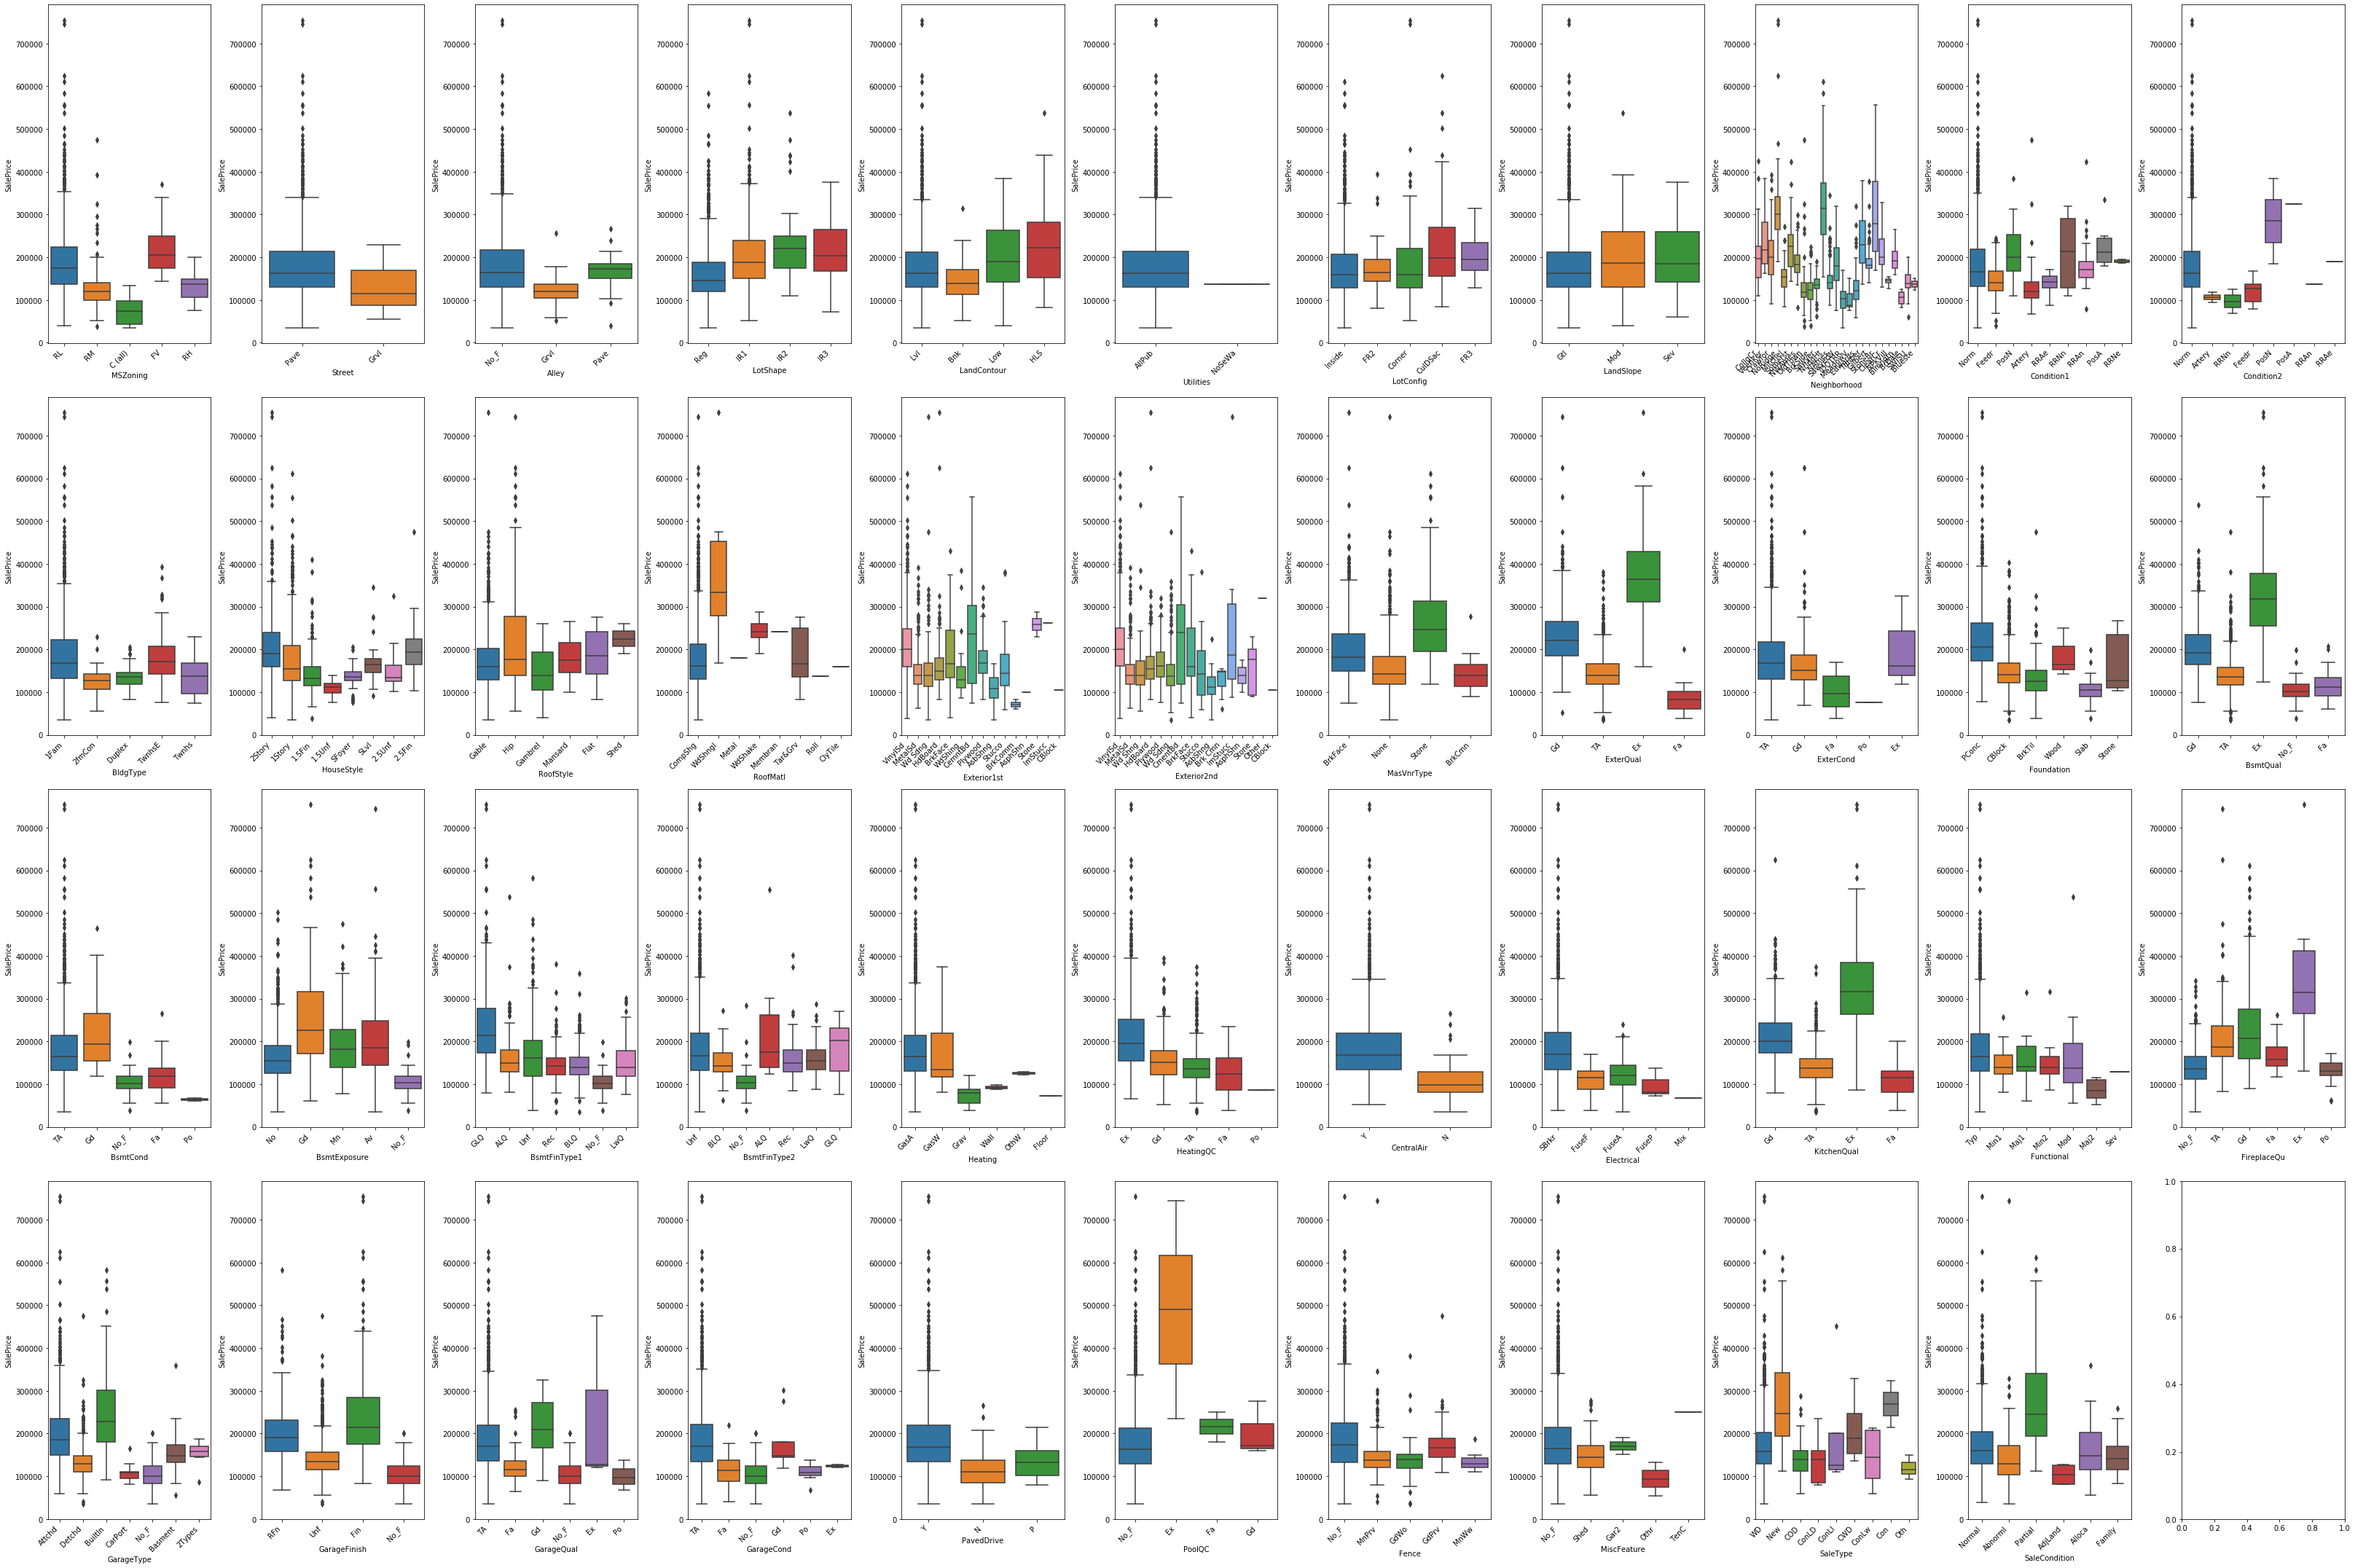

In [7]:
df_cat = df.select_dtypes(include=['object'])
column_list=df_cat.columns

df_cat=pd.concat([df_cat,df[['SalePrice']]],axis=1)

# PLOT CATEGORICAL BOX-PLOT
plot_boxplot(11,4,df_cat,20,40,box=1)

Que veiem amb les variables categoriques?: (podriem treure alguna taula amb estadistiques aqui?)
1. Variables que mostrin variabilitat alta en Preu segons feature:   
   -MSZoning, Neighborhood, Condition1, Condition2, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentraiAir, Electrical, KitchenQual, FireplaceQu,GarageType, GarageFinish, GarageQual, PoolQC, SaleType, SaleCondition 
2. Variabilitat mitjana:  
    -Street,Alley,LotShape, LandContour,LotConfig, BidgType, Functional, GarageCond, PaveDrive, MiscFeature, 
3. Independents de la categoria:  
    -Utilities, LandSlope, Fence, 

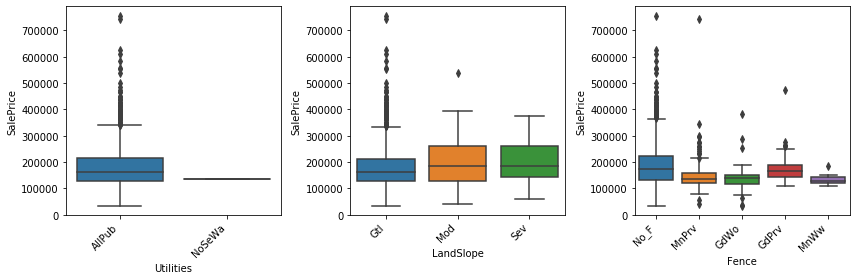

In [8]:
#CATEGORIES TO ELIMINATE?
column_list=['Utilities','LandSlope','Fence']

df_elim=pd.concat([df_cat[column_list],df[['SalePrice']]],axis=1)

# PLOT CATEGORICAL TO ELIMINATE BOX-PLOT
plot_boxplot(1,3,df_elim,12,4)

The features `Utilities`, `Landslope` and `Fence` are eliminated (boxplot revealed low dependence on SalesPrice to these features)

In [9]:
df_cat.drop(columns=['Utilities','LandSlope','Fence'], inplace=True)

Can we convert some of the categorical data into numerical? (avoid posterior dummy). 

In [10]:
cleanup_nums = {"LotShape":     {"IR3": 0, "IR2": 1, "IR1": 2, "Reg": 3},
                "LandSlope": {"Gtl": 0, "Mod": 1, "Sev": 2 },
                "ExterQual": {"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4},
                "ExterCond": {"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4},
                "BsmtQual": {"No_F":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
                "BsmtCond": {"No_F":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
                "BsmtExposure": {"No_F":0,"No":1,"Mn":2,"Av":3,"Gd":4},
                "BsmtFinType1": {"No_F":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6},
                "BsmtFinType2": {"No_F":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6},
                "HeatingQC": {"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4},
                "KitchenQual": {"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4},
                "FireplaceQu": {"No_F":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
                "GarageQual": {"No_F":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
                "GarageCond": {"No_F":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
                "PoolQC": {"No_F":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
               }

# unos que son categoria y podemos pasar a numerico
df_cat.replace(cleanup_nums, inplace=True)

# guardamos una lista con los nombres que hemos pasado a categoria numerica con orden
columns_list_cat_num = ['LotShape','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
                        'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
                       'GarageCond','PoolQC']

In [11]:
df_cat['ExterQual'].head()

0    3
1    2
2    3
3    2
4    3
Name: ExterQual, dtype: int64

### 4.2. NUMERICAL DATA

EDA plots for numerical data. Some are `discrete` and some `continuous`. 

In [12]:
column_list=df.select_dtypes(include=['object']).columns
df_int = df.drop(columns=column_list)
column_list=df_int.columns
df_int.shape

(1460, 38)

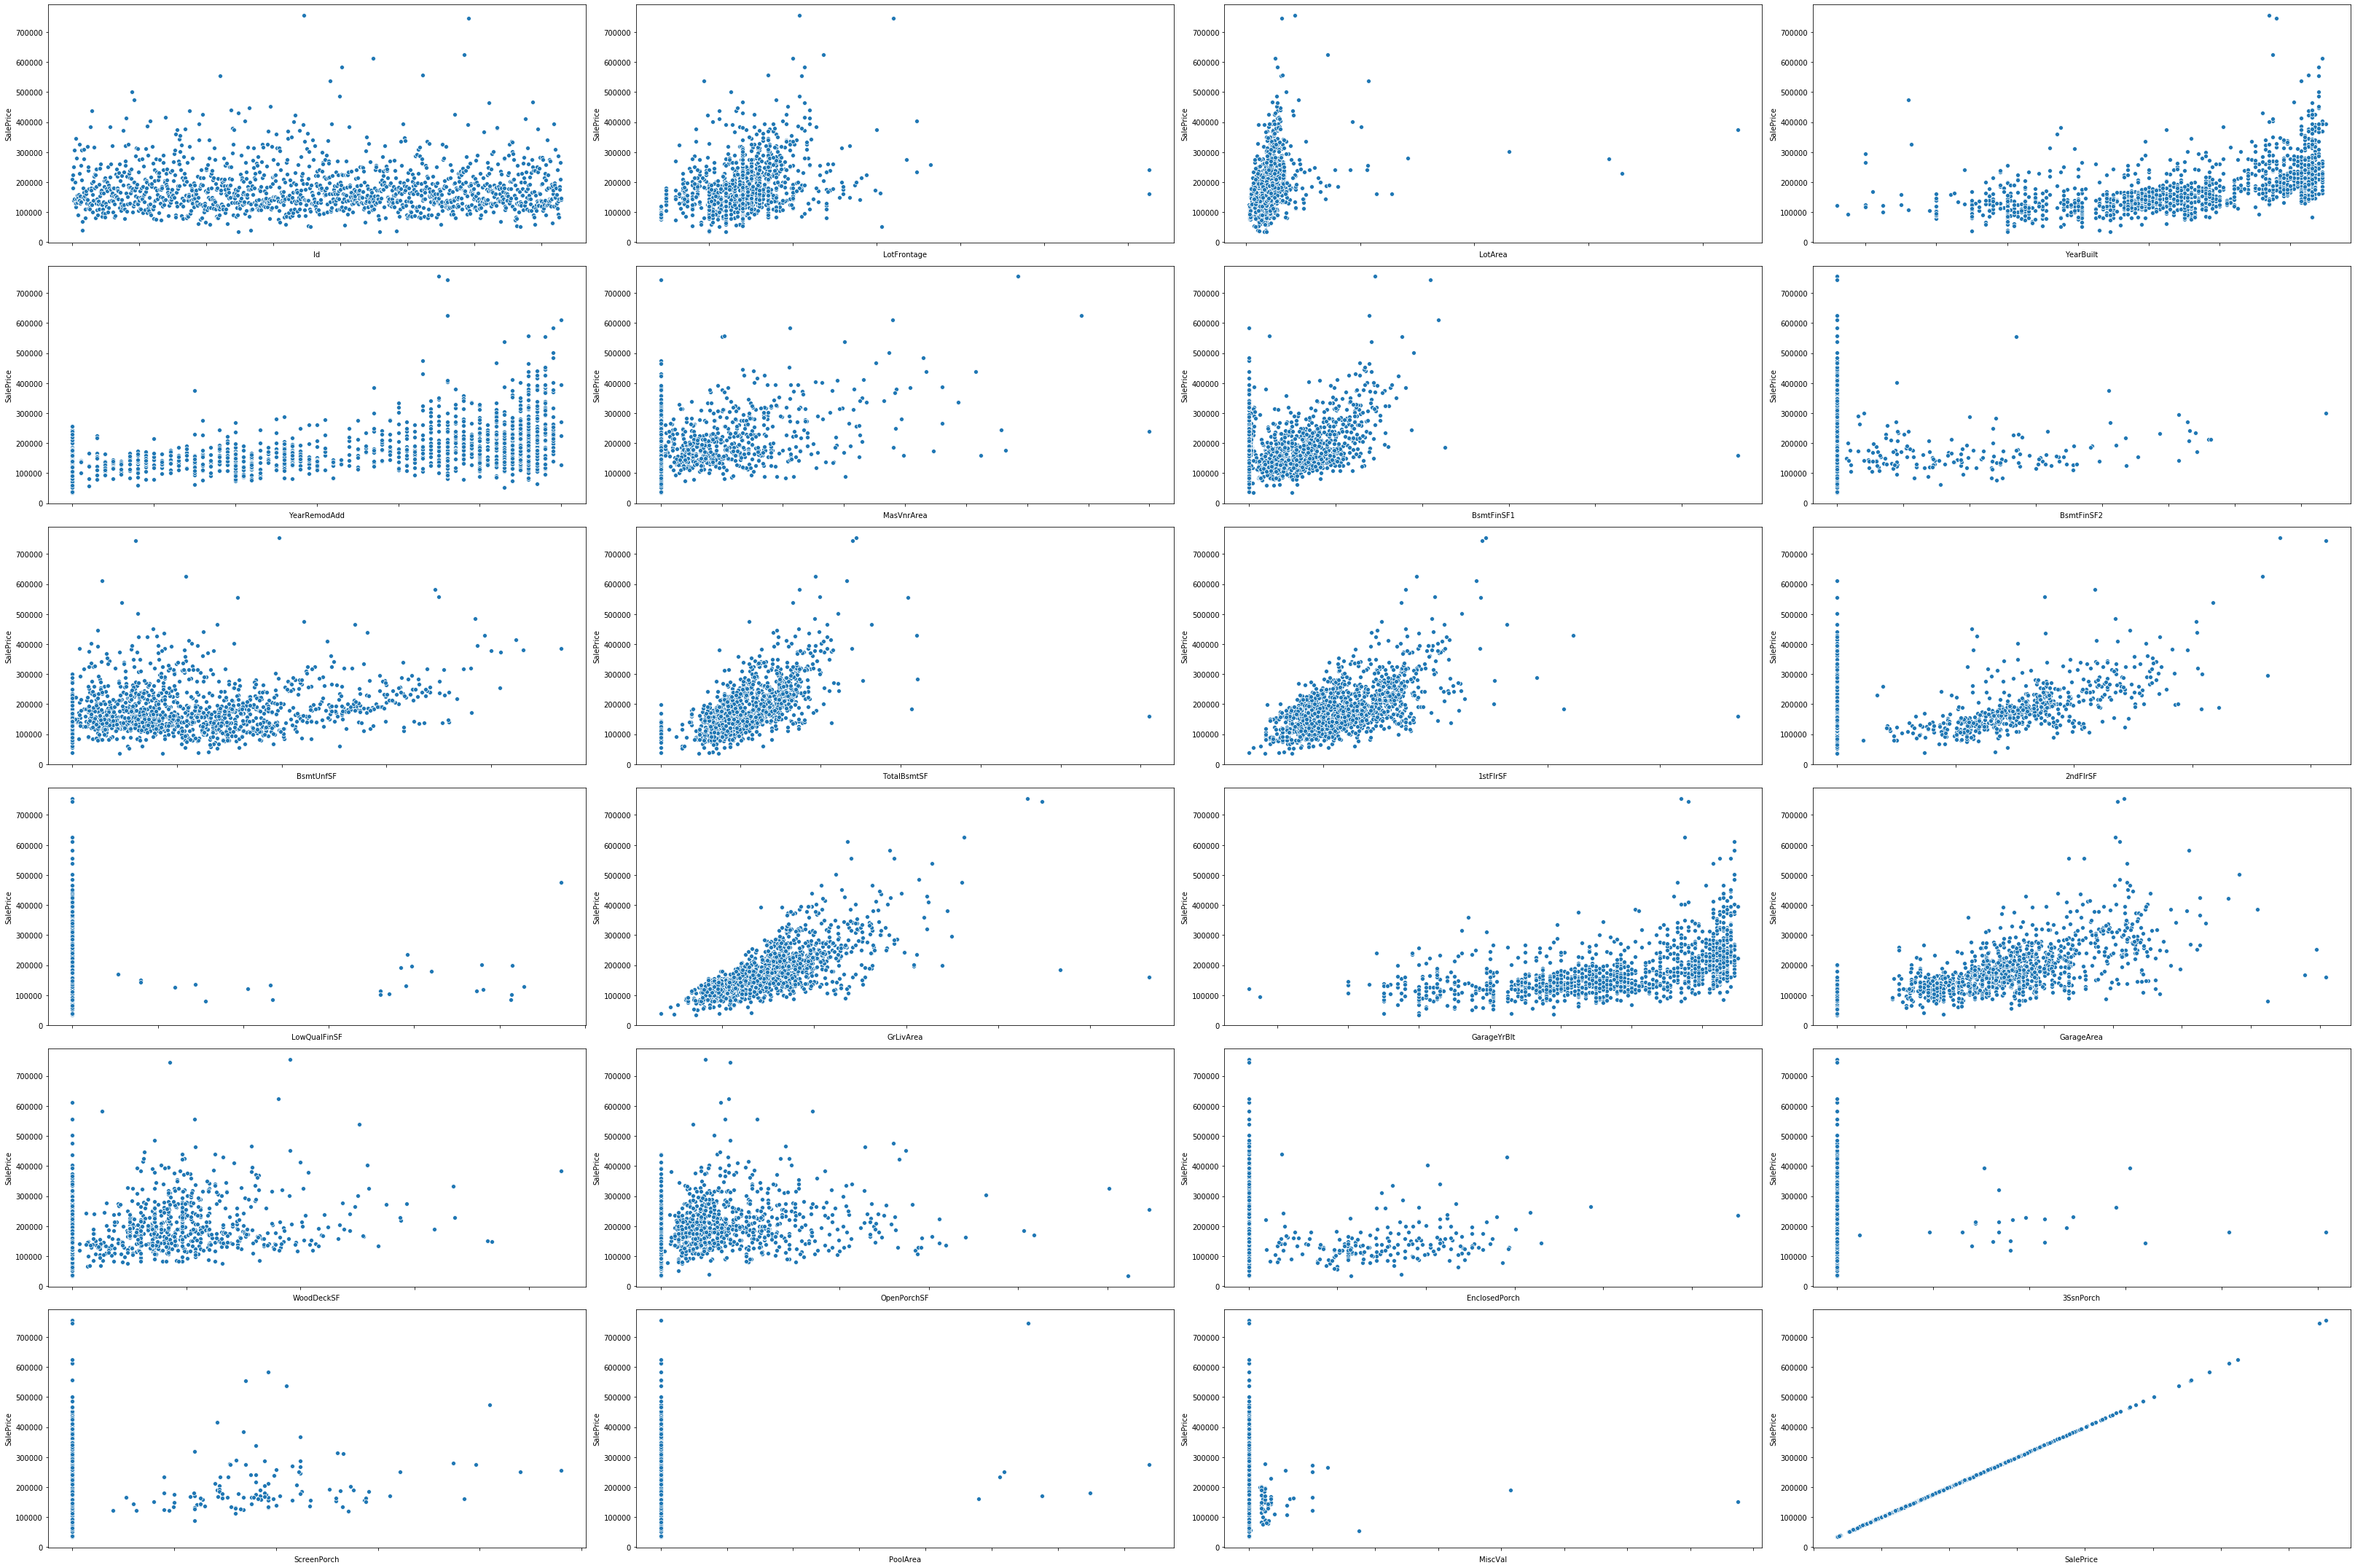

In [13]:
# CONTINUOUS FEATURES - SCATTERPLOT
df_cont = df_int.drop(columns=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
                               'FullBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                               'Fireplaces','GarageCars','MoSold','YrSold'])
column_list=df_cont.columns

# PLOT SCATTERPLOT
plot_boxplot(6,4,df_cont,45,30,box=0)

del df_cont

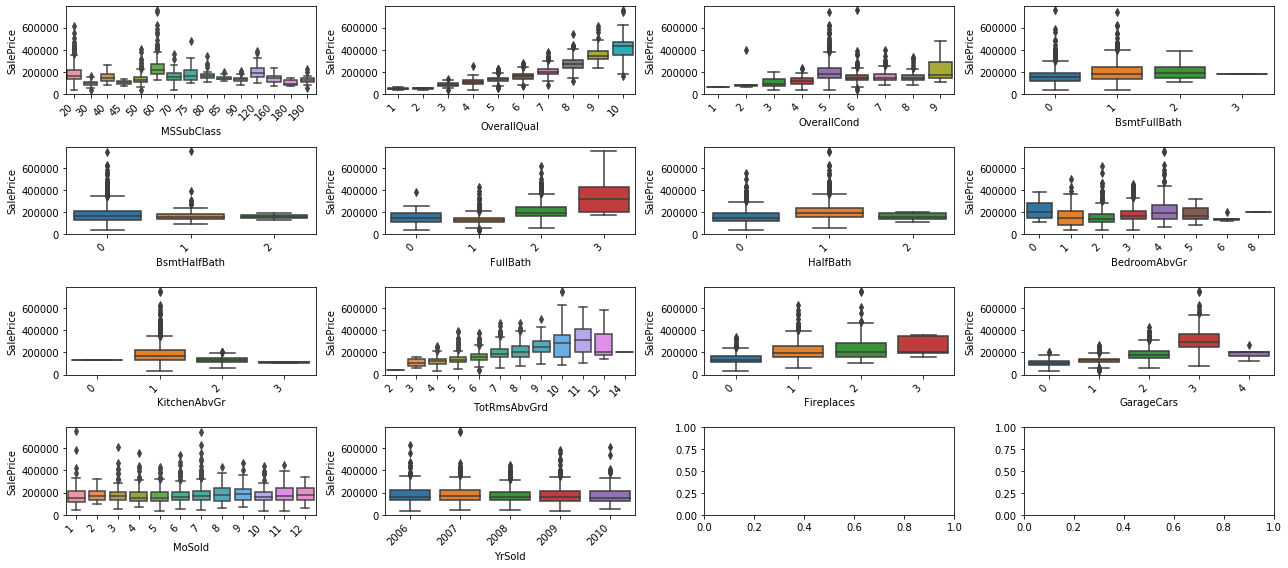

In [14]:
# DISCRETE FEATURES - BOXPLOT
df_disc = df_int[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
                               'FullBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd',
                               'Fireplaces','GarageCars','MoSold','YrSold']]
column_list=df_disc.columns
df_disc=pd.concat([df_disc[column_list],df[['SalePrice']]],axis=1)

#PLOT BOXPLOT
plot_boxplot(4,4,df_disc,18,8,box=1)

del df_disc

Numerical Variables.... check dependency?. A nivell visual:  

**1. Clear pattern (dependency)**: LotFrontage, OverallQual, OverallCond, YearBuilt, YearRemodAdd,BsmtFinSF1, TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea, TotRmsAbvGrd, GarageYrBlt, GarageCars,GarageArea,WoodDeckSF,Fireplaces      

**2. Some relation (not clear)**: MsSubClass, LotArea, FullBath,ScreenPorch, PoolArea, MiscVal 

**3. Not clear relationship**: MasVnrArea, BsmtFinSF2, BsmtUnfSF, LowQualFinSF,BsmtFullBath,BsmtHalfBath, HalfBath, BedroomAbvGr,KitchenAbvGr,OpenPorchSF,EnclosedPorch,3SsnPorch, MiscVal, MoSold, YrSold       

In [276]:
# drop data without clear relationship (int data, discrete and continuous)
df_int = df_int.drop(columns=['MasVnrArea','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtFullBath',
                     'BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                     'OpenPorchSF','EnclosedPorch','3SsnPorch','MiscVal','MoSold','YrSold'])

# separate if there is some int discrete that must be transformed to dummy feature
df_int_to_dummy=df_int['MSSubClass']

df_int=df_int.drop(columns='MSSubClass')

KeyError: "['MasVnrArea' 'BsmtFinSF2' 'BsmtUnfSF' 'LowQualFinSF' 'BsmtFullBath'\n 'BsmtHalfBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'OpenPorchSF'\n 'EnclosedPorch' '3SsnPorch' 'MiscVal' 'MoSold' 'YrSold'] not found in axis"

Ahora unimos el df de integer con los df categoricos que hemos pasado a numerico: df_int_total. Sobre este, podemos mirar una matriz de correlacion para ver si hay algo interesante...

In [241]:
df_cat[columns_list_cat_num].columns

Index(['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC'],
      dtype='object')

In [259]:
df_numeric= pd.concat([df_int,df_cat[columns_list_cat_num]],axis=1)

In [260]:


print ('Training correlations (Pearson): \n', cor["SalePrice"].sort_values(ascending=False))

Training correlations (Pearson): 
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.585207
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
GarageYrBlt     0.508043
YearRemodAdd    0.507101
Fireplaces      0.466929
HeatingQC       0.427649
BsmtFinSF1      0.386420
BsmtExposure    0.374696
LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
BsmtFinType1    0.304908
GarageQual      0.273839
LotArea         0.263843
GarageCond      0.263191
BsmtCond        0.212607
PoolQC          0.111696
ScreenPorch     0.111447
PoolArea        0.092404
ExterCond       0.018899
BsmtFinType2   -0.005323
Id             -0.021917
OverallCond    -0.077856
LotShape       -0.267759
Name: SalePrice, dtype: float64


In [261]:
#Correlation with output variable
cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.508043
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
ExterQual       0.682639
BsmtQual        0.585207
HeatingQC       0.427649
KitchenQual     0.659600
FireplaceQu     0.520438
Name: SalePrice, dtype: float64

y ahora obtenemos el categorico que no está con valores ordenados mas int discreto sin orden logico (para hacer Dummies)

In [277]:
df_to_dummy= pd.concat([df_cat.drop(columns=columns_list_cat_num),df_int_to_dummy],axis=1)

In [278]:
df_to_dummy.columns

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
       'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature', 'SaleType',
       'SaleCondition', 'SalePrice', 'MSSubClass'],
      dtype='object')

In [279]:
df_numeric.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'ExterQual', 'BsmtQual', 'HeatingQC',
       'KitchenQual', 'FireplaceQu'],
      dtype='object')

In [280]:
l=relevant_features.index.to_list()
l.remove('SalePrice')

In [281]:
df_numeric=df_numeric[l]

## PreProcessing
1. categorical to dummy (not categorical with ordered nums..)
2. categorical + numeric --> standarization

In [282]:
# dummy
df_to_dummy = df_to_dummy.drop(columns=['SalePrice'])
df_to_dummy= df_to_dummy[['Neighborhood','Condition2']]
df_cat_D = pd.get_dummies(df_to_dummy,dummy_na=False, drop_first=True)

In [283]:
# scalling
column_name= df_numeric.columns
# STANDARIZE DATA USING STANDARDSCALER
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_numeric[column_name] = pd.DataFrame(sc.fit_transform(df_numeric),columns=column_name)
df_numeric.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu
0,0.666667,0.949275,0.883333,0.140098,0.119780,0.259231,0.666667,0.500000,0.000000,0.949275,0.50,0.386460,0.666667,0.8,1.00,0.666667,0.0
1,0.555556,0.753623,0.433333,0.206547,0.212942,0.174830,0.666667,0.333333,0.333333,0.753623,0.50,0.324401,0.333333,0.8,1.00,0.333333,0.6
2,0.666667,0.934783,0.866667,0.150573,0.134465,0.273549,0.666667,0.333333,0.333333,0.934783,0.50,0.428773,0.666667,0.8,1.00,0.666667,0.6
3,0.666667,0.311594,0.333333,0.123732,0.143873,0.260550,0.333333,0.416667,0.333333,0.913043,0.75,0.452750,0.333333,0.6,0.75,0.666667,0.8
4,0.777778,0.927536,0.833333,0.187398,0.186095,0.351168,0.666667,0.583333,0.333333,0.927536,0.75,0.589563,0.666667,0.8,1.00,0.666667,0.6


In [284]:
df_numeric.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'ExterQual', 'BsmtQual', 'HeatingQC',
       'KitchenQual', 'FireplaceQu'],
      dtype='object')

In [285]:
df_cat_D.columns

Index(['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn'],
      dtype='object')

In [286]:
#unimos numericos con categorias
df_train = pd.concat([df_numeric,df_cat_D],axis=1)
df_train.shape

(1460, 48)

In [287]:
df_train=df_train
df_train.shape

(1460, 48)

## Comencem amb algunes features (les mes tipiques)

In [288]:
y=df['SalePrice']
X=df_train

Per a les numeriques, hem deixat tant de valors continus (tamanys, metres lineals, etc), com dicrets (nombre labavos i Quality y condition , ja que van de 0 a 10!).
Si escalem dades, el YearRemodd ja quedarà tb ok.

In [289]:
## model multilineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

LR=LinearRegression(n_jobs=-1)

In [290]:
results_rms = cross_val_score(LR, X_train, y_train, cv=6, scoring='neg_root_mean_squared_error')
results_r2 = cross_val_score(LR, X_train, y_train, cv=6, scoring='r2')
#results = cross_val_score(LR, X_train, y_train, cv=6, scoring='r2')
print('R^2 (coefficient of determination) regression score function for the cross validation:',results_r2.mean())
print('Root Mean Squared Error score function for the cross validation:',-results_rms.mean())

R^2 (coefficient of determination) regression score function for the cross validation: 0.7258394048654663
Root Mean Squared Error score function for the cross validation: 37620.75854086324


In [ ]:
X.shape

In [291]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

In [ ]:
error()